# Inteligenta Artificiala - Tema 2 CA - Predictii
    Dumitru Bianca Stefania, 332CA, mai 2024


In [981]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tabulate import tabulate

## 1. Explorarea datelor

In [982]:
dataset_avc_full = pd.read_csv("AVC/AVC_full.csv")
dataset_avc_train = pd.read_csv("AVC/AVC_train.csv")
dataset_avc_test = pd.read_csv("AVC/AVC_test.csv")

avc_numeric_attributes = [
    "mean_blood_sugar_level",
    "body_mass_indicator",
    "years_old",
    "analysis_results",
    "biological_age_index",
]
avc_categoric_attributes = [
    "cardiovascular_issues",
    "job_category",
    "sex",
    "tobacco_usage",
    "high_blood_pressure",
    "married",
    "living_area",
    "chaotic_sleep",
]
avc_attributes = avc_numeric_attributes + avc_categoric_attributes
avc_target_attribute = "cerebrovascular_accident"

dataset_salary_full = pd.read_csv("SalaryPrediction/SalaryPrediction_full.csv")
dataset_salary_train = pd.read_csv("SalaryPrediction/SalaryPrediction_train.csv")
dataset_salary_test = pd.read_csv("SalaryPrediction/SalaryPrediction_test.csv")

salary_numeric_attributes = ["fnl", "hpw", "gain", "edu_int", "years", "loss", "prod"]
salary_categoric_attributes = [
    "relation",
    "country",
    "job",
    "work_type",
    "partner",
    "edu",
    "gender",
    "race",
    "gtype",
]
salary_attributes = avc_numeric_attributes + avc_categoric_attributes
salary_target_attribute = "money"

### 1.1 Analiza tipului de atribute și a plajei de valori a acestora

#### 1.1.1 Atribute numerice continue

In [983]:
def analyse_numeric_attr(dataset, numeric_attributes):
    for attribute in numeric_attributes:
        attribute_desc = dataset[attribute].describe().to_frame()
        print(tabulate(attribute_desc, headers="keys", tablefmt="grid"))

        dataset.boxplot(column=attribute)
        plt.show()

+-------+--------------------------+
|       |   mean_blood_sugar_level |
+=======+==========================+
| count |                5110      |
+-------+--------------------------+
| mean  |                 106.148  |
+-------+--------------------------+
| std   |                  45.2836 |
+-------+--------------------------+
| min   |                  55.12   |
+-------+--------------------------+
| 25%   |                  77.245  |
+-------+--------------------------+
| 50%   |                  91.885  |
+-------+--------------------------+
| 75%   |                 114.09   |
+-------+--------------------------+
| max   |                 271.74   |
+-------+--------------------------+


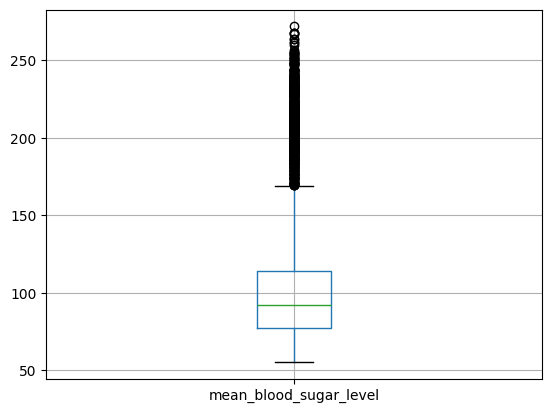

+-------+-----------------------+
|       |   body_mass_indicator |
+=======+=======================+
| count |            4909       |
+-------+-----------------------+
| mean  |              28.8932  |
+-------+-----------------------+
| std   |               7.85407 |
+-------+-----------------------+
| min   |              10.3     |
+-------+-----------------------+
| 25%   |              23.5     |
+-------+-----------------------+
| 50%   |              28.1     |
+-------+-----------------------+
| 75%   |              33.1     |
+-------+-----------------------+
| max   |              97.6     |
+-------+-----------------------+


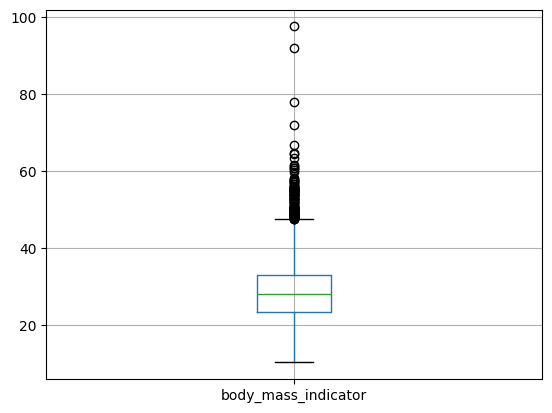

+-------+-------------+
|       |   years_old |
+=======+=============+
| count |   5110      |
+-------+-------------+
| mean  |     46.5687 |
+-------+-------------+
| std   |     26.5939 |
+-------+-------------+
| min   |      0.08   |
+-------+-------------+
| 25%   |     26      |
+-------+-------------+
| 50%   |     47      |
+-------+-------------+
| 75%   |     63.75   |
+-------+-------------+
| max   |    134      |
+-------+-------------+


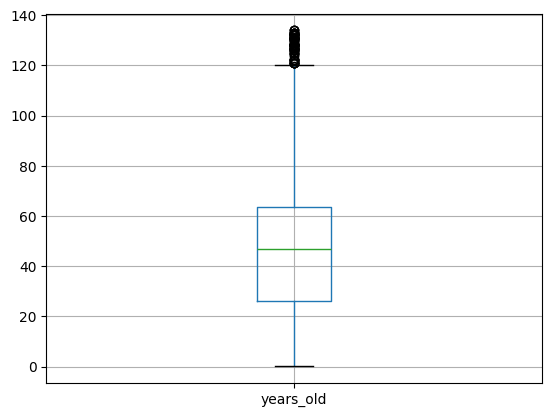

+-------+--------------------+
|       |   analysis_results |
+=======+====================+
| count |           4599     |
+-------+--------------------+
| mean  |            323.523 |
+-------+--------------------+
| std   |            101.577 |
+-------+--------------------+
| min   |            104.83  |
+-------+--------------------+
| 25%   |            254.646 |
+-------+--------------------+
| 50%   |            301.032 |
+-------+--------------------+
| 75%   |            362.823 |
+-------+--------------------+
| max   |            756.808 |
+-------+--------------------+


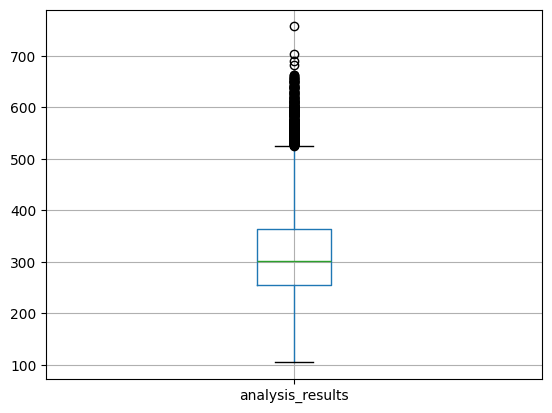

+-------+------------------------+
|       |   biological_age_index |
+=======+========================+
| count |              5110      |
+-------+------------------------+
| mean  |               134.784  |
+-------+------------------------+
| std   |                50.3994 |
+-------+------------------------+
| min   |               -15.1095 |
+-------+------------------------+
| 25%   |                96.7106 |
+-------+------------------------+
| 50%   |               136.375  |
+-------+------------------------+
| 75%   |               172.507  |
+-------+------------------------+
| max   |               266.986  |
+-------+------------------------+


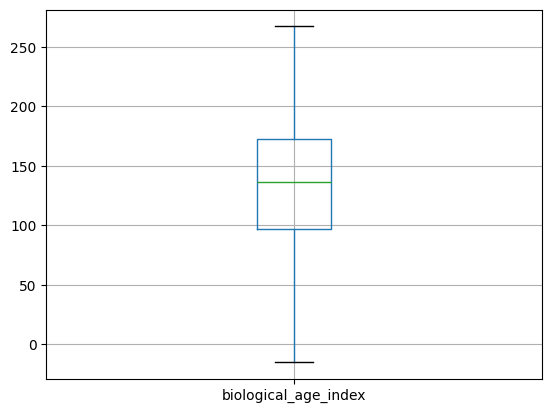

In [984]:
# Analiza atributelor numerice pentru setul de date AVC (full)
analyse_numeric_attr(dataset_avc_full, avc_numeric_attributes)

+-------+------------------+
|       |              fnl |
+=======+==================+
| count |   9999           |
+-------+------------------+
| mean  | 190353           |
+-------+------------------+
| std   | 106071           |
+-------+------------------+
| min   |  19214           |
+-------+------------------+
| 25%   | 118282           |
+-------+------------------+
| 50%   | 178472           |
+-------+------------------+
| 75%   | 237311           |
+-------+------------------+
| max   |      1.45544e+06 |
+-------+------------------+


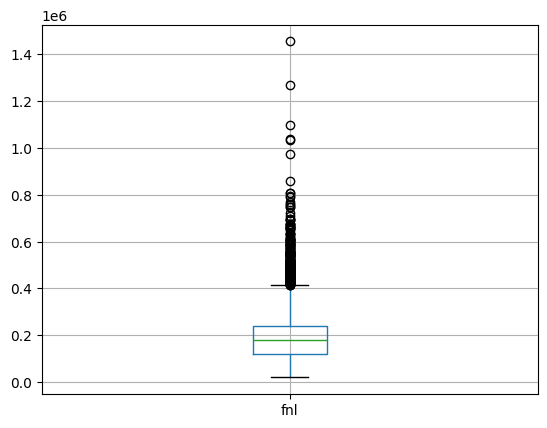

+-------+-----------+
|       |       hpw |
+=======+===========+
| count | 9199      |
+-------+-----------+
| mean  |   40.4162 |
+-------+-----------+
| std   |   12.5174 |
+-------+-----------+
| min   |    1      |
+-------+-----------+
| 25%   |   40      |
+-------+-----------+
| 50%   |   40      |
+-------+-----------+
| 75%   |   45      |
+-------+-----------+
| max   |   99      |
+-------+-----------+


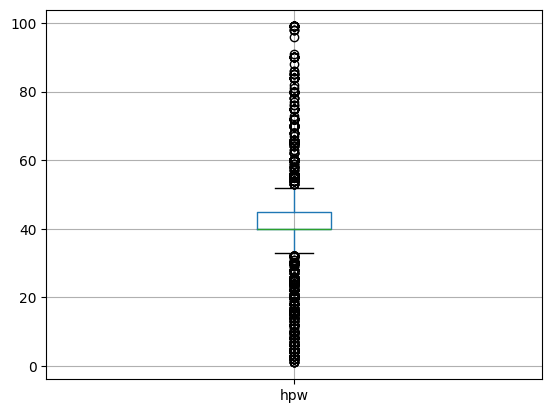

+-------+-----------+
|       |      gain |
+=======+===========+
| count |  9999     |
+-------+-----------+
| mean  |   979.853 |
+-------+-----------+
| std   |  7003.8   |
+-------+-----------+
| min   |     0     |
+-------+-----------+
| 25%   |     0     |
+-------+-----------+
| 50%   |     0     |
+-------+-----------+
| 75%   |     0     |
+-------+-----------+
| max   | 99999     |
+-------+-----------+


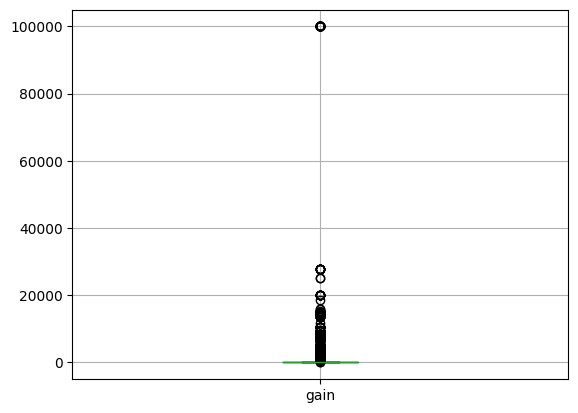

+-------+-----------+
|       |   edu_int |
+=======+===========+
| count | 9999      |
+-------+-----------+
| mean  |   14.262  |
+-------+-----------+
| std   |   24.7708 |
+-------+-----------+
| min   |    1      |
+-------+-----------+
| 25%   |    9      |
+-------+-----------+
| 50%   |   10      |
+-------+-----------+
| 75%   |   13      |
+-------+-----------+
| max   |  206      |
+-------+-----------+


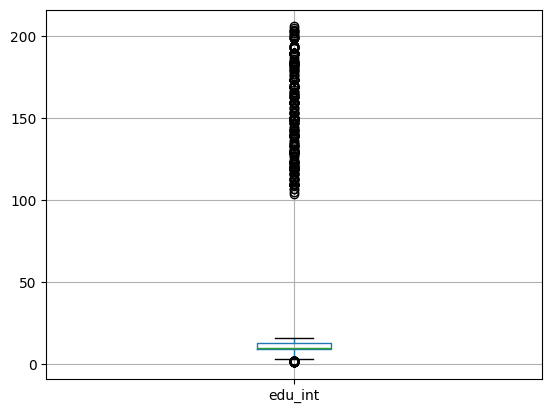

+-------+-----------+
|       |     years |
+=======+===========+
| count | 9999      |
+-------+-----------+
| mean  |   38.6469 |
+-------+-----------+
| std   |   13.7451 |
+-------+-----------+
| min   |   17      |
+-------+-----------+
| 25%   |   28      |
+-------+-----------+
| 50%   |   37      |
+-------+-----------+
| 75%   |   48      |
+-------+-----------+
| max   |   90      |
+-------+-----------+


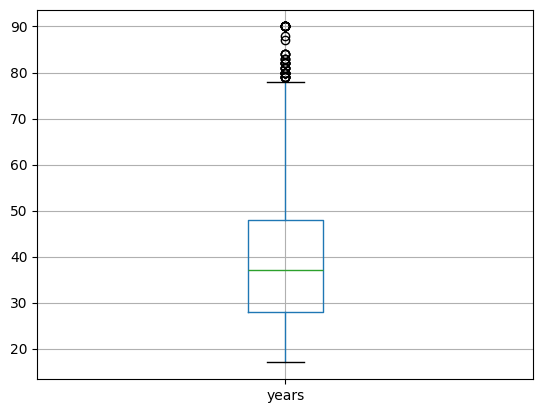

+-------+-----------+
|       |      loss |
+=======+===========+
| count | 9999      |
+-------+-----------+
| mean  |   84.1114 |
+-------+-----------+
| std   |  394.035  |
+-------+-----------+
| min   |    0      |
+-------+-----------+
| 25%   |    0      |
+-------+-----------+
| 50%   |    0      |
+-------+-----------+
| 75%   |    0      |
+-------+-----------+
| max   | 3770      |
+-------+-----------+


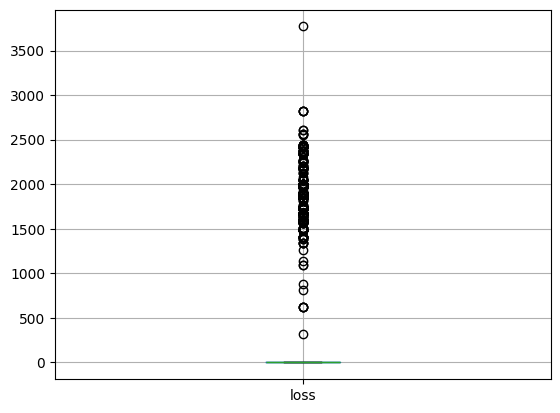

+-------+-----------+
|       |      prod |
+=======+===========+
| count |   9999    |
+-------+-----------+
| mean  |   2014.93 |
+-------+-----------+
| std   |  14007.6  |
+-------+-----------+
| min   |    -28    |
+-------+-----------+
| 25%   |     42    |
+-------+-----------+
| 50%   |     57    |
+-------+-----------+
| 75%   |     77    |
+-------+-----------+
| max   | 200125    |
+-------+-----------+


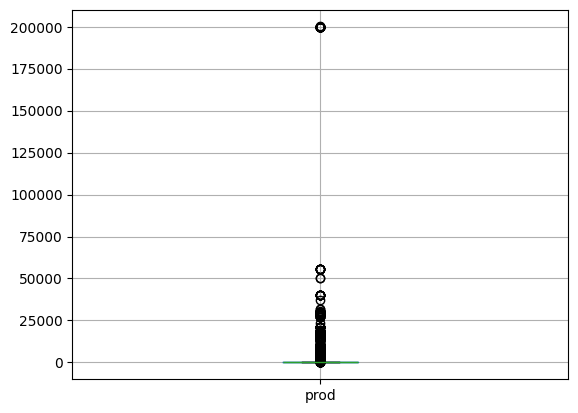

In [985]:
# Analiza atributelor numerice pentru setul de date SalaryPrediction (full)
analyse_numeric_attr(dataset_salary_full, salary_numeric_attributes)

In urma observarii BoxPloturilor pentru ambele seturi de date, am remarcat faptul ca, pentru multe dintre atribute, exista destul de multe valori outlier. Acestea vor fi ulterior eliminate si imputate.

#### 1.1.2. Atribute discrete sau ordinale

In [986]:
def analyse_categoric_attr(dataset, categoric_attributes):
    for attribute in categoric_attributes:
        examples = dataset[attribute].count()
        values = dataset[attribute].unique()

        print(f"{attribute}:\nTotal no. of examples: {examples}.\nNo. of unique values: {len(values)}.\nValues: {values}")

        dataset[attribute].value_counts().plot(kind="bar")
        plt.xlabel(attribute)
        plt.ylabel("No. of examples")
        plt.show()

cardiovascular_issues:
Total no. of examples: 5110.
No. of unique values: 2.
Values: [1 0]


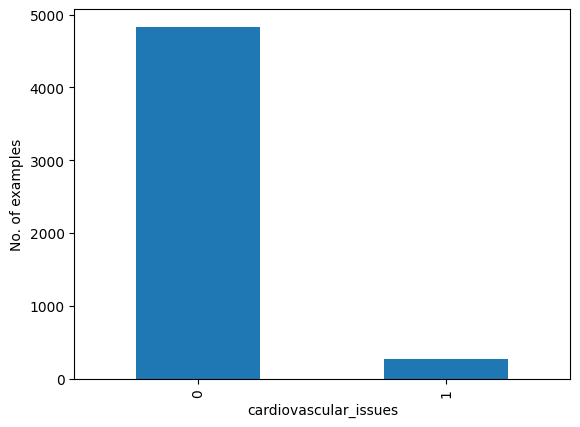

job_category:
Total no. of examples: 5110.
No. of unique values: 5.
Values: ['private_sector' 'entrepreneurial' 'public_sector' 'child'
 'N_work_history']


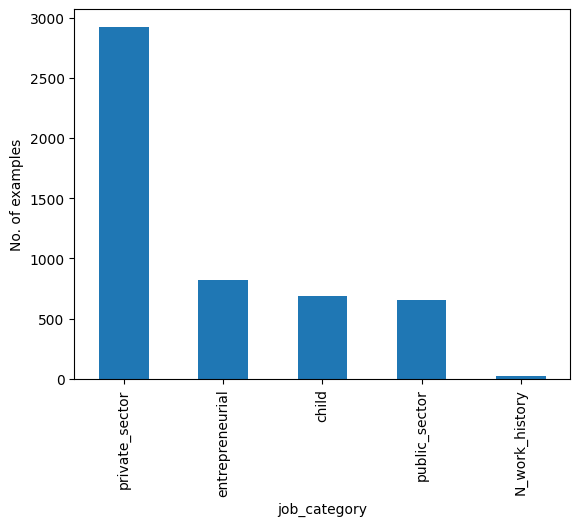

sex:
Total no. of examples: 5110.
No. of unique values: 2.
Values: ['M' 'F']


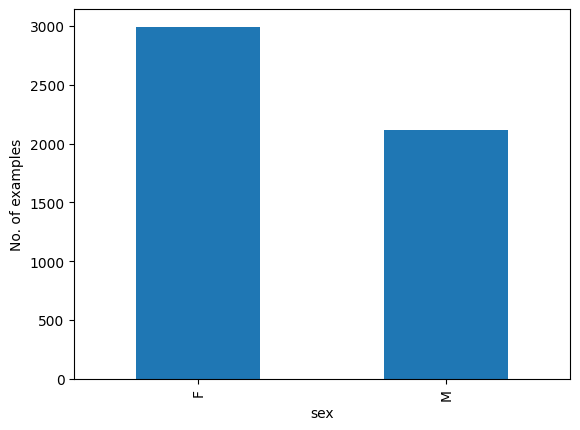

tobacco_usage:
Total no. of examples: 5110.
No. of unique values: 4.
Values: ['ex-smoker' 'non-smoker' 'smoker' 'not_defined']


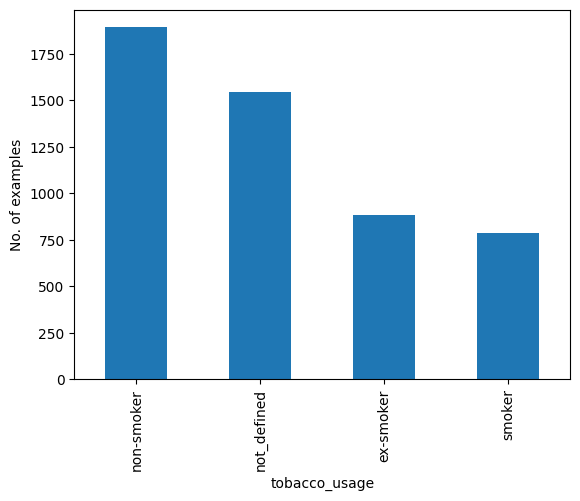

high_blood_pressure:
Total no. of examples: 5110.
No. of unique values: 2.
Values: [0 1]


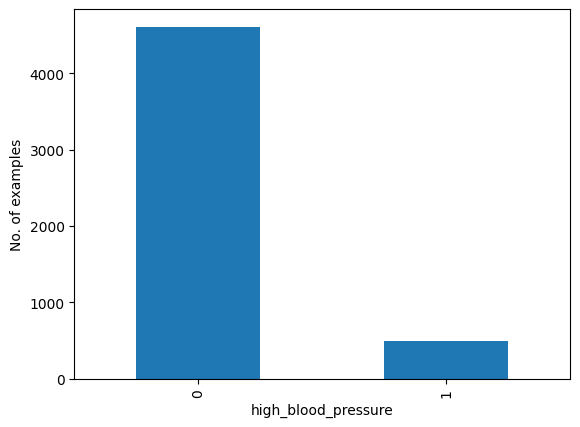

married:
Total no. of examples: 4599.
No. of unique values: 3.
Values: ['Y' 'N' nan]


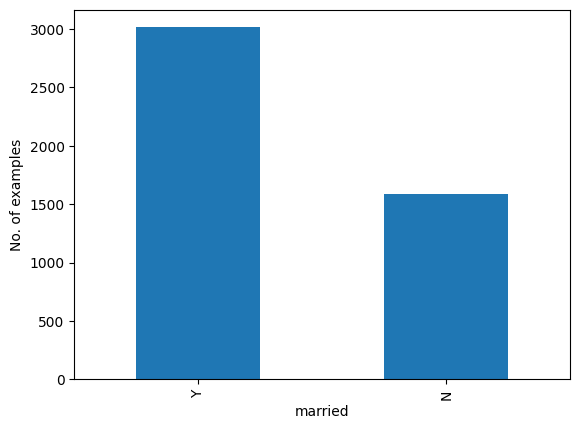

living_area:
Total no. of examples: 5110.
No. of unique values: 2.
Values: ['City' 'Countryside']


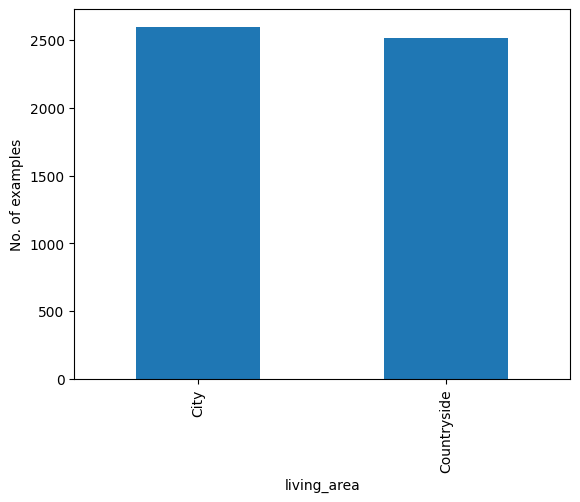

chaotic_sleep:
Total no. of examples: 5110.
No. of unique values: 2.
Values: [1 0]


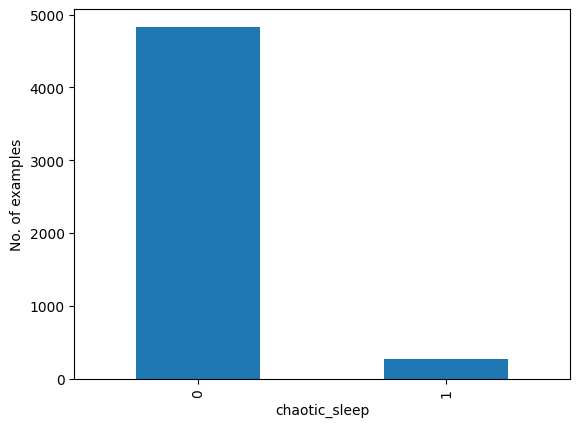

In [987]:
# Analiza atributelor categorice pentru setul de date AVC (full)
analyse_categoric_attr(dataset_avc_full, avc_categoric_attributes)

relation:
Total no. of examples: 9999.
No. of unique values: 6.
Values: ['NotM' 'NotF' 'H' 'OwnC' 'Other' 'W']


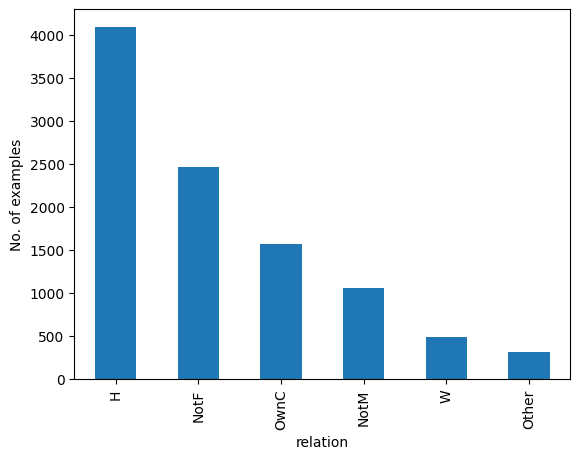

country:
Total no. of examples: 9999.
No. of unique values: 41.
Values: ['United-States' 'China' 'Mexico' 'Canada' 'Haiti' 'Ecuador' 'India'
 'Cuba' 'El-Salvador' 'England' 'Poland' '?' 'Taiwan' 'Puerto-Rico'
 'Trinadad&Tobago' 'Dominican-Republic' 'Philippines' 'Germany' 'Portugal'
 'Greece' 'Vietnam' 'Italy' 'Jamaica' 'Guatemala' 'Yugoslavia' 'Columbia'
 'Thailand' 'Peru' 'Japan' 'Outlying-US(Guam-USVI-etc)' 'Scotland'
 'Ireland' 'Laos' 'Cambodia' 'South' 'Nicaragua' 'Iran' 'Hungary' 'France'
 'Honduras' 'Hong']


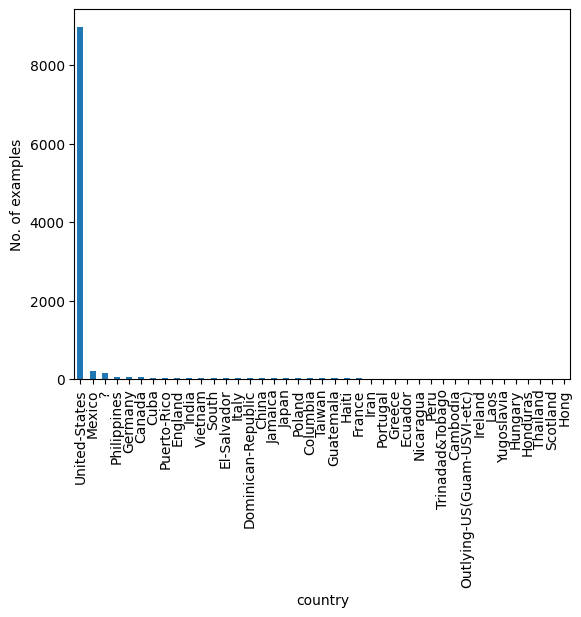

job:
Total no. of examples: 9999.
No. of unique values: 14.
Values: ['Adm-clerical' 'Craft-repair' 'Sales' 'Exec-managerial'
 'Machine-op-inspct' 'Other-service' '?' 'Prof-specialty'
 'Farming-fishing' 'Protective-serv' 'Tech-support' 'Transport-moving'
 'Handlers-cleaners' 'Priv-house-serv']


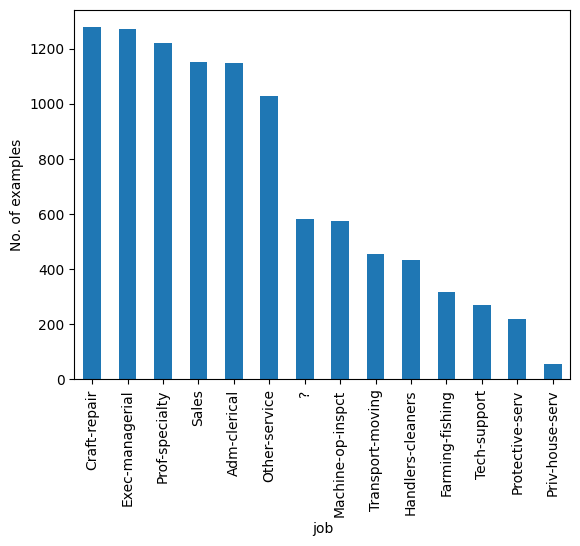

work_type:
Total no. of examples: 9999.
No. of unique values: 9.
Values: ['Priv' 'LGov' 'SelfInc' '?' 'FGov' 'SGov' 'SelfNotInc' 'NW' 'WoPay']


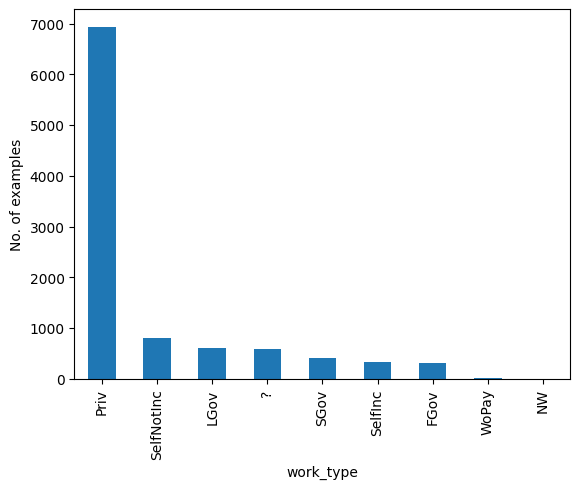

partner:
Total no. of examples: 9999.
No. of unique values: 7.
Values: ['D' 'NM' 'MCS' 'W' 'S' 'MSA' 'MAS']


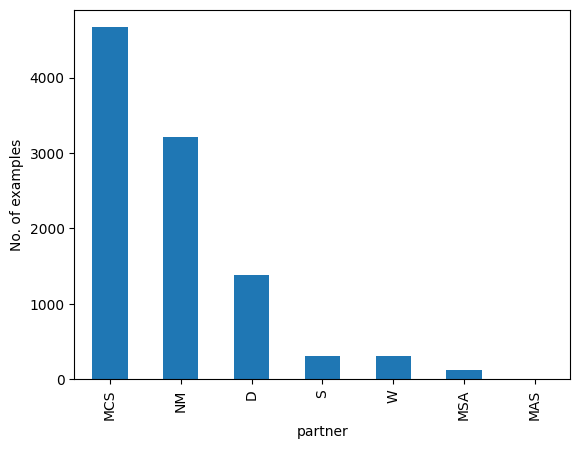

edu:
Total no. of examples: 9999.
No. of unique values: 16.
Values: ['SC' 'HSG' 'B' '11' 'M' '12' '9' 'AA' 'D' '10' 'AV' 'PS' '1-4' '7-8'
 '5-6' 'P']


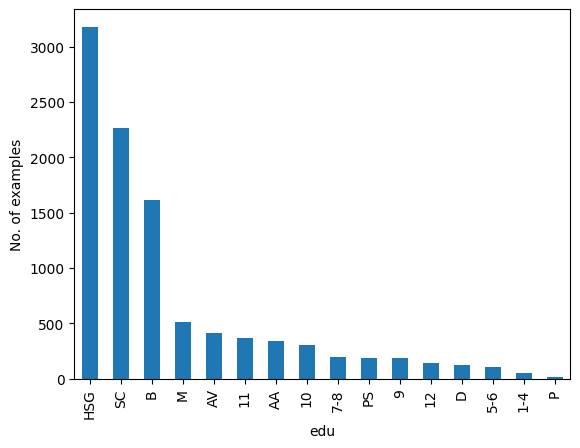

gender:
Total no. of examples: 9199.
No. of unique values: 3.
Values: [nan 'M' 'F']


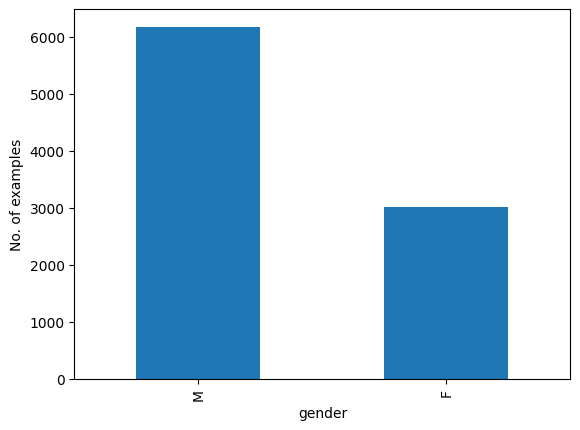

race:
Total no. of examples: 9999.
No. of unique values: 5.
Values: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


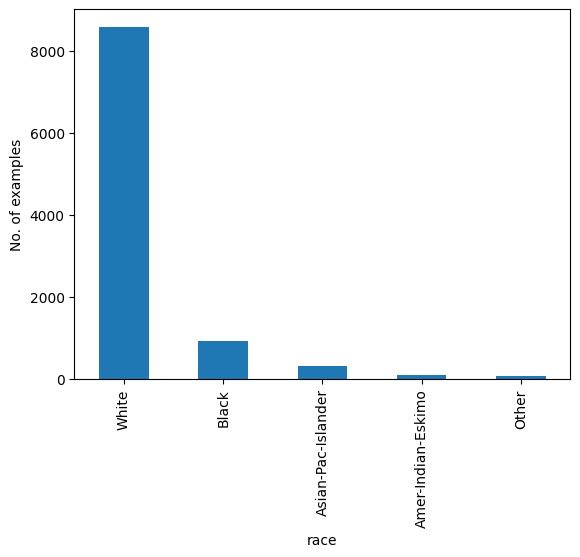

gtype:
Total no. of examples: 9999.
No. of unique values: 2.
Values: ['DC' 'AC']


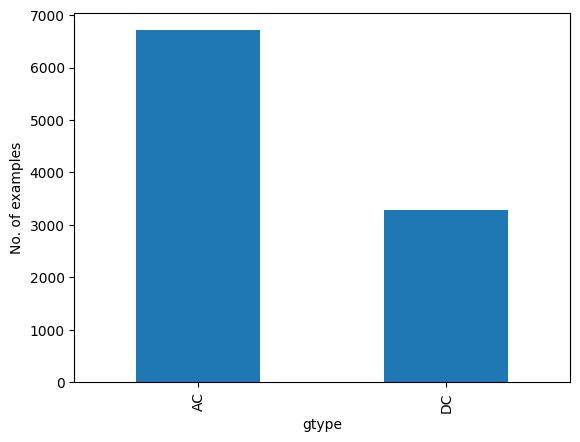

In [988]:
# Analiza atributelor categorice pentru setul de date SalaryPrediction (full)
analyse_categoric_attr(dataset_salary_full, salary_categoric_attributes)

Am observat ca pentru majoritatea atributelor, distributia intre categoriile unui atribut nu este echilibrata. Exista si atribute foarte dezechilibrate, cum ar fi 'race', unde predomina cu mult 'White' sau 'country', unde valoarea cea mai intalnita este 'United-States'.

### 1.2. Analiza echilibrului de clase

In [989]:
def analyse_class_balance(dataset, target_attribute):
    dataset[target_attribute].value_counts().plot(kind="bar")
    plt.xlabel(target_attribute)
    plt.ylabel(f"No. of examples")
    plt.show()

AVC
Full dataset


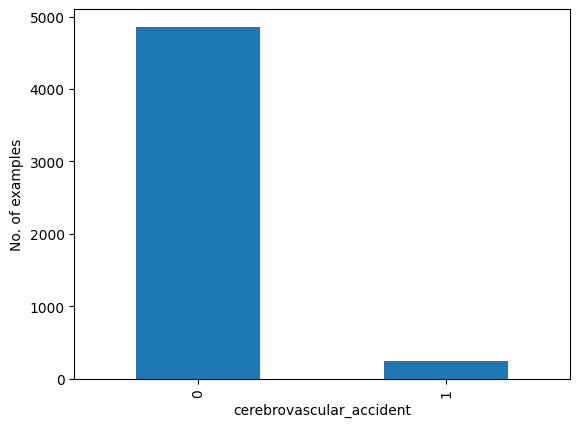

Train dataset


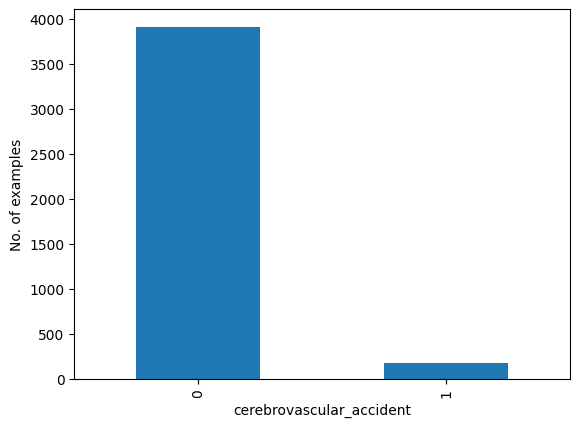

Test dataset


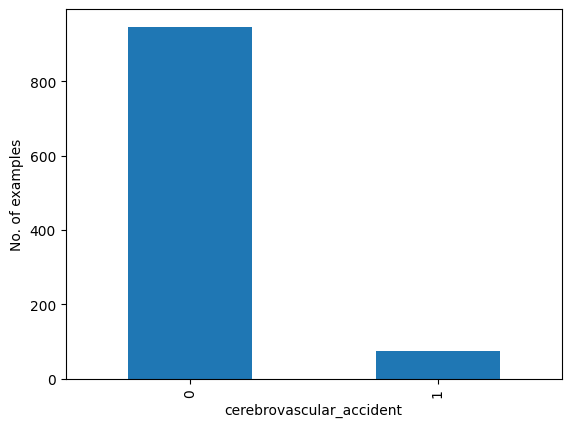

In [990]:
print("AVC")
print("Full dataset")
analyse_class_balance(dataset_avc_full, avc_target_attribute)
print("Train dataset")
analyse_class_balance(dataset_avc_train, avc_target_attribute)
print("Test dataset")
analyse_class_balance(dataset_avc_test, avc_target_attribute)

Clasele din setul de date AVC sunt foarte dezechilibrate, majoritatea exemplelor reprezentand clasa persoanelor care nu au avut un AVC. Impartirea intre clase este foarte asemanatoare intre setul de train si test. Din acest motiv, se poate presupune ca clasificarea va fi mai dificila, riscandu-se predictii eronate pentru clasa cu suport scăzut (persoane care au avut un AVC).

SalaryPrediction
Full dataset


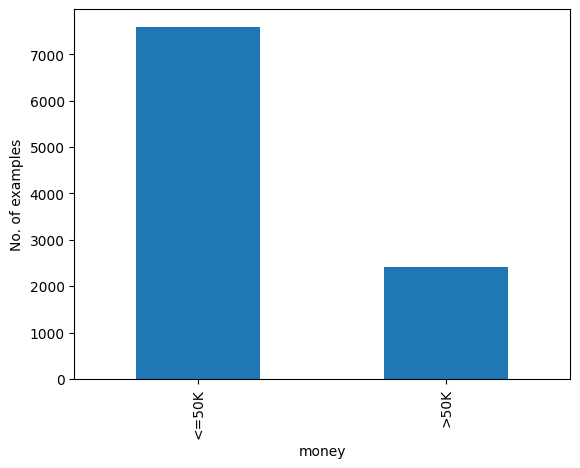

Train dataset


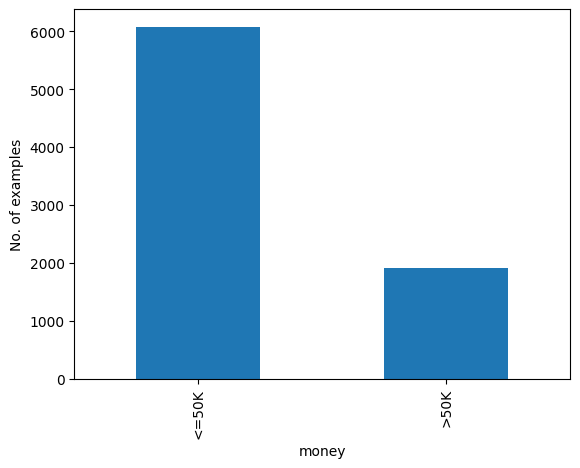

Test dataset


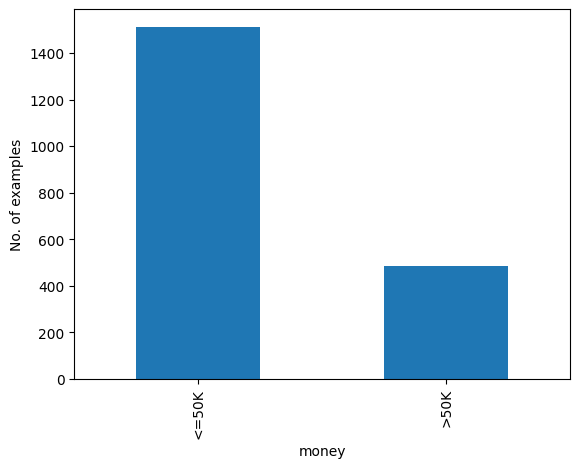

money
<=50K    6078
>50K     1921
Name: count, dtype: int64


In [991]:
print("SalaryPrediction")
print("Full dataset")
analyse_class_balance(dataset_salary_full, salary_target_attribute)
print("Train dataset")
analyse_class_balance(dataset_salary_train, salary_target_attribute)
print("Test dataset")
analyse_class_balance(dataset_salary_test, salary_target_attribute)

print(dataset_salary_train[salary_target_attribute].value_counts())

La fel ca in cazul celuilalt dataset, si datasetul SalaryPrediction prezinta un dezechilibru intre clase, insa mai putin semnificativ in comparatie cu primul dataset. Clasa cu suport scazut este cea a persoanelor cu salariu > 50K.

### 1.3. Analiza corelației între atribute

#### 1.3.1. Analize de corelație între atributele numerice continue

In [992]:
def analyse_correlation_numeric(dataset, numeric_attributes):
    numericDf = dataset[numeric_attributes]

    # Calculeaza corelatia intre fiecare pereche de atribute numerice
    # folosind metoda Pearson
    correlations = numericDf.corr()

    for i in range(len(numeric_attributes)):
        for j in range(i + 1, len(numeric_attributes)):
            if correlations.iat[i, j] > 0.7:
                print(
                    f"Corelatie puternica intre atributele {numeric_attributes[i]} si {numeric_attributes[j]}: {correlations.iat[i,j]}"
                )

    fig = plt.figure(figsize=(len(numeric_attributes), len(numeric_attributes)))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=0, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(numeric_attributes), 1)

    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(numeric_attributes, rotation=90)
    ax.set_yticklabels(numeric_attributes)

    plt.show()

Corelatie puternica intre atributele mean_blood_sugar_level si analysis_results: 0.894288567902789
Corelatie puternica intre atributele years_old si biological_age_index: 0.7141350328697109


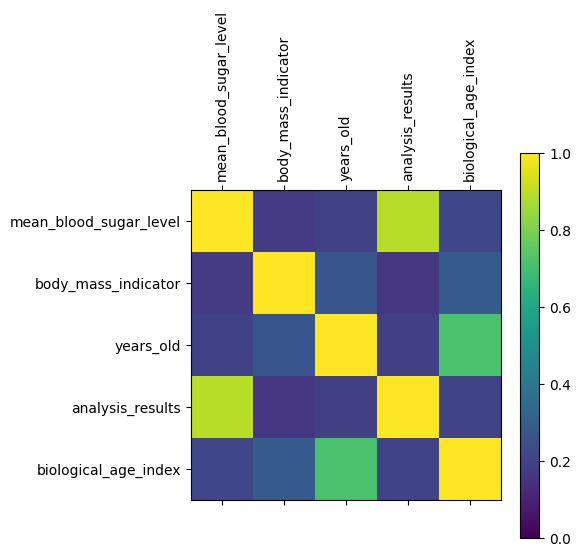

In [993]:
analyse_correlation_numeric(dataset_avc_full, avc_numeric_attributes)

Corelatie puternica intre atributele gain si prod: 0.9999984180215457


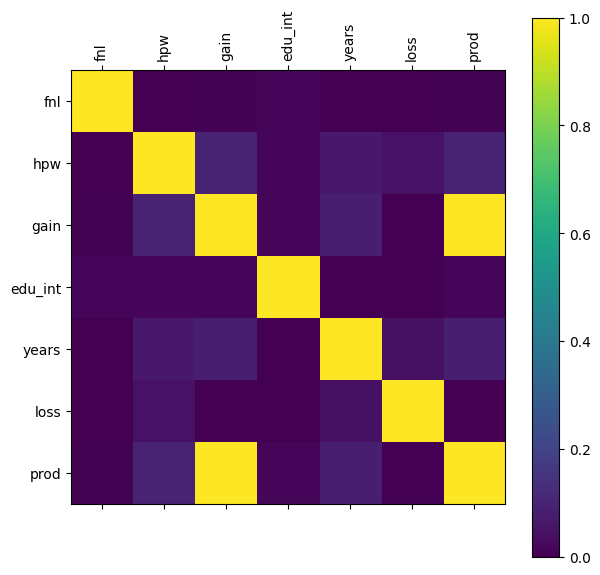

In [994]:
analyse_correlation_numeric(dataset_salary_full, salary_numeric_attributes)

#### 1.3.2. Analize de corelație între atributele categorice

In [995]:
from scipy.stats import chi2_contingency


def analyse_correlation_categoric(dataset, categoric_attributes):
    # Initializez dataframe-ul de corelatii cu 1
    correlations = pd.DataFrame(
        data=np.ones((len(categoric_attributes), len(categoric_attributes))),
        index=categoric_attributes,
        columns=categoric_attributes,
    )

    for i in range(len(categoric_attributes)):
        for j in range(i + 1, len(categoric_attributes)):
            attribute1 = categoric_attributes[i]
            attribute2 = categoric_attributes[j]

            # Construiesc tabele de contingenta pentru perechile de atribute
            CrosstabResult = pd.crosstab(
                index=dataset[attribute1], columns=dataset[attribute2]
            )

            # Rulez testul Chi2 pentru a determina daca cele doua atribute sunt corelate
            ChiSqResult = chi2_contingency(CrosstabResult)
            chi2 = ChiSqResult[0]
            n = dataset.shape[0]
            k1 = len(CrosstabResult.index)
            k2 = len(CrosstabResult.columns)

            # Calculez testul Cramer V pentru a determina puterea corelatiei
            cramer = np.sqrt(chi2 / (n * (min(k1, k2) - 1)))

            # Salvez rezultatul in dataframe
            correlations.at[attribute2, attribute1] = cramer
            correlations.at[attribute1, attribute2] = cramer

            if cramer > 0.7:
                print(
                    f"Corelatie puternica intre atributele {attribute1} si {attribute2}: {cramer}"
                )

    fig = plt.figure(figsize=(len(categoric_attributes), len(categoric_attributes)))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations.astype(float), vmin=0, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(categoric_attributes), 1)

    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(categoric_attributes, rotation=90)
    ax.set_yticklabels(categoric_attributes)

    plt.show()

Corelatie puternica intre atributele cardiovascular_issues si chaotic_sleep: 0.9980849717879993


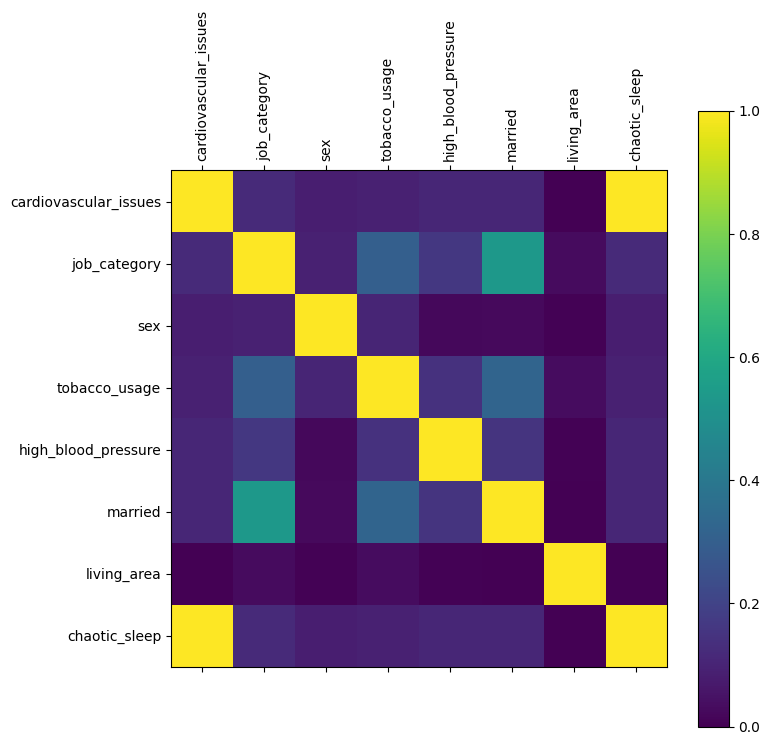

In [996]:
analyse_correlation_categoric(dataset_avc_full, avc_categoric_attributes)

Corelatie puternica intre atributele gender si gtype: 0.9589257175969128


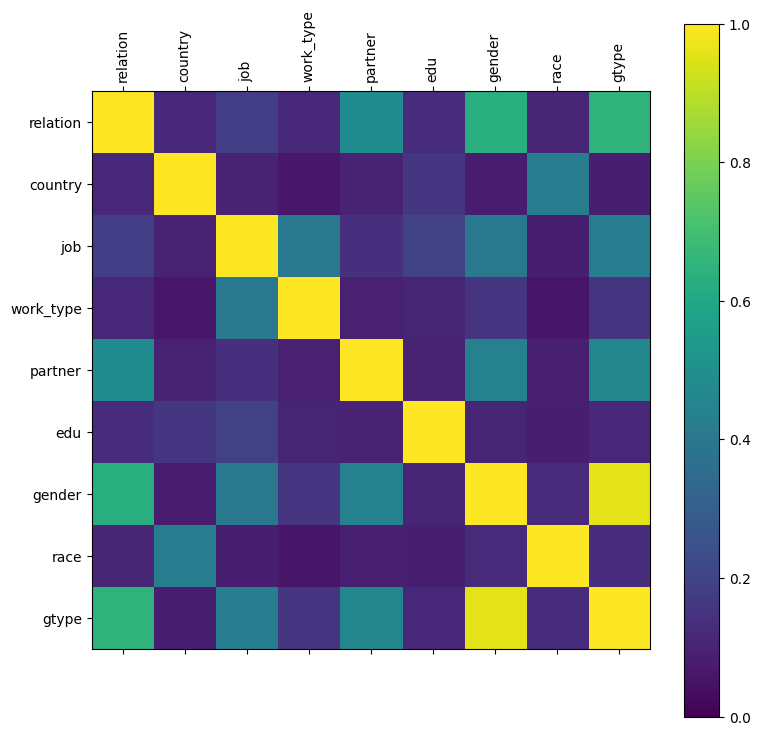

In [997]:
analyse_correlation_categoric(dataset_salary_full, salary_categoric_attributes)

## 2. Preprocesarea datelor

### 2.0. Impartirea setului de date in predictori (X) si target (y)

In [998]:
# Impartirea setului de date train in X (input) si y (output)
avc_X_train = dataset_avc_train.drop(columns=[avc_target_attribute])
avc_y_train = dataset_avc_train[avc_target_attribute]

# Impartirea setului de date test in X (input) si y (output)
avc_X_test = dataset_avc_test.drop(columns=[avc_target_attribute])
avc_y_test = dataset_avc_test[avc_target_attribute]

In [999]:
# Impartirea setului de date train in X (input) si y (output)
salary_X_train = dataset_salary_train.drop(columns=[salary_target_attribute])
salary_y_train = dataset_salary_train[salary_target_attribute]

# Impartirea setului de date test in X (input) si y (output)
salary_X_test = dataset_salary_test.drop(columns=[salary_target_attribute])
salary_y_test = dataset_salary_test[salary_target_attribute]

### 2.1. Inlocuirea datelor lipsa pentru un atribut dintr-un esantion

In [1000]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Functie care returneaza un imputter univariat pentru un set de date si un set de atribute numerice
def univariate_imputter_fit(dataset, attributes, strategy="mean"):
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp.fit(dataset[attributes])
    return imp


# Functie care returneaza un imputter multivariat pentru un set de date si un set de atribute numerice
def multivariate_imputter_fit(dataset, attributes):
    imp = IterativeImputer(missing_values=np.nan, max_iter=10, random_state=0)
    imp.fit(dataset[attributes])
    return imp


# Functie care inputeaza valori lipsa pentru un set de date si un set de atribute numerice folosind un imputter
def imputter_transform(imp, dataset, attributes):
    dataset[attributes] = imp.transform(dataset[attributes])
    return dataset

### 2.2. Inlocuirea valorilor extreme pentru un atribut într-un eșantion

In [1001]:
# Functie care elimina valorile extreme specifice unui atribut dintr-un set de date,
# inlocuindu-le cu NaN, pentru a fi ulterior inputate
def remove_outliers(dataset, attribute, Q1, Q3):
    IQR = Q3 - Q1
    threshold = 1.5

    dataset.loc[
        (dataset[attribute] < Q1 - threshold * IQR)
        | (dataset[attribute] > Q3 + threshold * IQR),
        attribute,
    ] = np.nan

In [1002]:
# Functie pentru inputarea valorilor lipsa si a valorilor extreme pentru un set de date (train + test)
def input_missing_and_extreme_values(
    dataset_train,
    dataset_test,
    numeric_attributes,
    categoric_attributes,
    Q1_value,
    Q3_value,
):
    for attribute in numeric_attributes:
        Q1 = dataset_train[attribute].quantile(Q1_value)
        Q3 = dataset_train[attribute].quantile(Q3_value)

        # Elimin valorile extreme din ambele seturi de date pe baza
        # cuartilelor calculate pe setul train
        remove_outliers(dataset_train, attribute, Q1, Q3)
        remove_outliers(dataset_test, attribute, Q1, Q3)

    # Antrenez inputterul pe setul de date train
    # si il folosesc pentru a inputa valorile lipsa din ambele seturi de date

    imp_numeric = univariate_imputter_fit(dataset_train, numeric_attributes, "mean")
    dataset_train = imputter_transform(imp_numeric, dataset_train, numeric_attributes)
    dataset_test = imputter_transform(imp_numeric, dataset_test, numeric_attributes)

    # Elimin valori categorice necunoscute (precum ?) pentru a le imputa apoi
    unknown_categoric_values = ["not_defined", "?"]
    for attr in categoric_attributes:
        dataset_train.loc[dataset_train[attr].isin(unknown_categoric_values), attr] = (
            np.nan
        )
        dataset_test.loc[dataset_test[attr].isin(unknown_categoric_values), attr] = (
            np.nan
        )

    imp_categoric = univariate_imputter_fit(
        dataset_train, categoric_attributes, "most_frequent"
    )
    dataset_train = imputter_transform(
        imp_categoric, dataset_train, categoric_attributes
    )
    dataset_test = imputter_transform(imp_categoric, dataset_test, categoric_attributes)

In [1003]:
input_missing_and_extreme_values(
    avc_X_train, avc_X_test, avc_numeric_attributes, avc_categoric_attributes, 0.2, 0.8
)

In [1004]:
input_missing_and_extreme_values(
    salary_X_train,
    salary_X_test,
    salary_numeric_attributes,
    salary_categoric_attributes,
    0.2,
    0.8,
)

### 2.3. Eliminarea atributelor redundante

Pe baza analizei de corelatie de mai sus in setul de date AVC, am gasit o corelatie puternica (>0.7 - Pearson pentru atributele numerice si >0.7 Cramer pentru atributele categorice) pentru urmatoarele perechi de atribute:
* mean_blood_sugar_level - analysis_results
* years_old - biological_age_index
* chaotic_sleep - cardiovascular_issues

Am ales sa elimin analysis_results, biological_age_index si chaotic_sleep.

In [1005]:
numeric_attr_to_drop = ["analysis_results", "biological_age_index"]
categoric_attr_to_drop = ["chaotic_sleep"]

avc_X_train = avc_X_train.drop(columns=numeric_attr_to_drop + categoric_attr_to_drop)
avc_X_test = avc_X_test.drop(columns=numeric_attr_to_drop + categoric_attr_to_drop)

for attr in numeric_attr_to_drop:
    avc_numeric_attributes.remove(attr)
for attr in categoric_attr_to_drop:
    avc_categoric_attributes.remove(attr)

Pe baza analizei de corelatie de mai sus in setul de date SalaryPrediction, am gasit o corelatie puternica pentru urmatoarele perechi de atribute:
* gain - prod
* gtype - gender

Am ales sa elimin gain si gtype.

In [1006]:
numeric_attr_to_drop = ["gain"]
categoric_attr_to_drop = ["gtype"]

salary_X_train = salary_X_train.drop(
    columns=numeric_attr_to_drop + categoric_attr_to_drop
)
salary_X_test = salary_X_test.drop(
    columns=numeric_attr_to_drop + categoric_attr_to_drop
)

for attr in numeric_attr_to_drop:
    salary_numeric_attributes.remove(attr)
for attr in categoric_attr_to_drop:
    salary_categoric_attributes.remove(attr)

### 2.4. Standardizarea valorilor atributelor numerice

In [1007]:
# Functie care returneaza un scaler StandardScaler pentru un set de date si un set de atribute numerice
def standardize_fit_StandardScaler(dataset, numeric_attributes):
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(dataset[numeric_attributes])
    return scaler


# Functie care returneaza un scaler MinMaxScaler pentru un set de date si un set de atribute numerice
def standardize_fit_MinMaxScaler(dataset, numeric_attributes):
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    scaler.fit(dataset[numeric_attributes])
    return scaler


# Functie care returneaza un scaler RobustScaler pentru un set de date si un set de atribute numerice
def standardize_fit_RobustScaler(dataset, numeric_attributes):
    from sklearn.preprocessing import RobustScaler

    scaler = RobustScaler()
    scaler.fit(dataset[numeric_attributes])
    return scaler


# Functie care standardizeaza un set de date folosind un scaler
def standardize_transform(scaler, dataset, numeric_attributes):
    dataset[numeric_attributes] = scaler.transform(dataset[numeric_attributes])
    return dataset


def fit_and_standardize_dataset(
    dataset_train, dataset_test, numeric_attributes, scaler_type
):
    if scaler_type == "StandardScaler":
        scaler = standardize_fit_StandardScaler(dataset_train, numeric_attributes)
    elif scaler_type == "MinMaxScaler":
        scaler = standardize_fit_MinMaxScaler(dataset_train, numeric_attributes)
    elif scaler_type == "RobustScaler":
        scaler = standardize_fit_RobustScaler(dataset_train, numeric_attributes)

    dataset_train = standardize_transform(scaler, dataset_train, numeric_attributes)
    dataset_test = standardize_transform(scaler, dataset_test, numeric_attributes)

    return dataset_train, dataset_test

In [1008]:
# Standadizarea atributelor numerice pentru setul de date AVC (train + test)
avc_X_train, avc_X_test = fit_and_standardize_dataset(
    avc_X_train, avc_X_test, avc_numeric_attributes, "StandardScaler"
)

In [1009]:
# Standadizarea atributelor numerice pentru setul de date SalaryPrediction (train + test)
salary_X_train, salary_X_test = fit_and_standardize_dataset(
    salary_X_train, salary_X_test, salary_numeric_attributes, "StandardScaler"
)

#### 2.5.  Transformarea atributelor categoriale intr-o forma numerica 

In [1010]:
# Encodarea atributelor categorice pentru un set de date folosind OneHotEncoder
def encode_OneHotEncoder(dataset, categoric_attributes):
    dataset = pd.get_dummies(dataset, columns=categoric_attributes)
    return dataset


# Enccodarea variabilei tinta pentru un set de date folosind LabelEncoder
def encode_LabelEncoder(target):
    from sklearn.preprocessing import LabelEncoder

    enc = LabelEncoder()
    target = enc.fit_transform(target)
    return pd.Series(target)

In [1011]:
# Encodarea atributelor categorice si a variabilei tinta pentru setul de date AVC (train)
avc_X_train = encode_OneHotEncoder(avc_X_train, avc_categoric_attributes)
avc_y_train = encode_LabelEncoder(avc_y_train)

# Encodarea atributelor categorice si a variabilei tinta pentru setul de date SalaryPrediction (train)
avc_X_test = encode_OneHotEncoder(avc_X_test, avc_categoric_attributes)
avc_y_test = encode_LabelEncoder(avc_y_test)

In [1012]:
# Encodarea atributelor categorice si a variabilei tinta pentru setul de date SalaryPrediction (train)
salary_X_train = encode_OneHotEncoder(salary_X_train, salary_categoric_attributes)
salary_y_train = encode_LabelEncoder(salary_y_train)

# Encodarea atributelor categorice si a variabilei tinta pentru setul de date SalaryPrediction (test)
salary_X_test = encode_OneHotEncoder(salary_X_test, salary_categoric_attributes)
salary_y_test = encode_LabelEncoder(salary_y_test)

# Aducerea setului de date test la aceeasi forma cu setul de date train prin adaugarea de coloane lipsa
salary_X_test = salary_X_test.reindex(columns=salary_X_train.columns, fill_value=0)

#### 2.6. Folosirea over-sampling sau under-sampling pentru a aduce echilibru in setul de date

In [1013]:
def resample_smoteen(dataset_X, dataset_y):
    from imblearn.combine import SMOTEENN

    print(dataset_y.value_counts())
    smote_enn = SMOTEENN(random_state=0)
    dataset_X, dataset_y = smote_enn.fit_resample(dataset_X, dataset_y)
    print(dataset_y.value_counts())

    return dataset_X, dataset_y


def resample_smote(dataset_X, dataset_y):
    from imblearn.over_sampling import SMOTE

    print(dataset_y.value_counts())
    smote = SMOTE(random_state=0)
    dataset_X, dataset_y = smote.fit_resample(dataset_X, dataset_y)
    print(dataset_y.value_counts())

    return dataset_X, dataset_y


def resample_adasyn(dataset_X, dataset_y):
    from imblearn.over_sampling import ADASYN

    print(dataset_y.value_counts())
    adasyn = ADASYN(random_state=0)
    dataset_X, dataset_y = adasyn.fit_resample(dataset_X, dataset_y)
    print(dataset_y.value_counts())

    return dataset_X, dataset_y


def resample_smotetomek(dataset_X, dataset_y):
    from imblearn.combine import SMOTETomek
    from imblearn.under_sampling import TomekLinks

    print(dataset_y.value_counts())
    smote_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy="majority"))
    dataset_X, dataset_y = smote_tomek.fit_resample(dataset_X, dataset_y)
    print(dataset_y.value_counts())

    return dataset_X, dataset_y


def resample_random_oversampler(dataset_X, dataset_y):
    from imblearn.over_sampling import RandomOverSampler

    print(dataset_y.value_counts())
    oversample = RandomOverSampler(sampling_strategy="minority")
    dataset_X, dataset_y = oversample.fit_resample(dataset_X, dataset_y)
    print(dataset_y.value_counts())

    return dataset_X, dataset_y


def resample_dataset(dataset_X, dataset_y, strategy):
    if strategy == "SMOTEENN":
        return resample_smoteen(dataset_X, dataset_y)
    elif strategy == "SMOTE":
        return resample_smote(dataset_X, dataset_y)
    elif strategy == "ADASYN":
        return resample_adasyn(dataset_X, dataset_y)
    elif strategy == "SMOTETomek":
        return resample_smotetomek(dataset_X, dataset_y)
    elif strategy == "RandomOversampler":
        return resample_random_oversampler(dataset_X, dataset_y)

In [1014]:
avc_X_train, avc_y_train = resample_dataset(avc_X_train, avc_y_train, "SMOTETomek")

0    3914
1     174
Name: count, dtype: int64
1    3914
0    3902
Name: count, dtype: int64


In [1015]:
salary_X_train, salary_y_train = resample_dataset(
    salary_X_train, salary_y_train, "SMOTETomek"
)

0    6078
1    1921
Name: count, dtype: int64
1    6078
0    5997
Name: count, dtype: int64


## 3. Utilizarea algoritmilor de Învățare Automată

### 3.1. Regresie Logistica

##### 3.1.1. Implementare manuala

In [1016]:
import numpy as np


# Functia de sigmoida logistica
def sigmoid(x):
    x = x.astype(float)
    return 1 / (1 + np.exp(-x))


# Functia de Negative Log Likelihood - functia J(w), unde Y este predictia data de modelul logistic,
# iar T sunt etichetele de clasa pentru cele N exemple din setul de date
def nll(Y, T):
    return -np.mean(T * np.log(Y) + (1 - T) * np.log(1 - Y))


# Functia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    correct_predictions = (Y >= 0.5) == T
    return np.mean(correct_predictions)


# Functia care prezice clasa pentru fiecare exemplu din setul de date
def predict_logistic(X, w, b):
    return sigmoid(np.dot(X, w) + b)


def train_and_eval_logistic(
    X_train, T_train, X_test, T_test, lr=0.01, epochs_no=1000, alpha=3
):
    # Antrenarea modelului logistic (cu ponderile W), executand epochs_no pasi din algoritmul de gradient descent
    (N_train, D) = X_train.shape
    N_test = X_test.shape[0]

    # Initializare ponderi
    w = np.zeros(D)
    b = 0

    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for _ in range(epochs_no):
        Y_train = predict_logistic(X_train, w, b)
        Y_test = predict_logistic(X_test, w, b)

        # Compute NLL and accuracy for train and test
        train_nll.append(nll(Y_train, T_train) + alpha / (2 * N_train) * np.dot(w, w))
        train_acc.append(accuracy(Y_train, T_train))

        test_nll.append(nll(Y_test, T_test) + alpha / (2 * N_test) * np.dot(w, w))
        test_acc.append(accuracy(Y_test, T_test))

        # Update weights w using gradient descent with L2 regularization
        gradient_w = (
            np.dot(X_train.T, Y_train - T_train) / N_train + alpha / N_train * w
        )
        gradient_b = np.mean(Y_train - T_train)

        w = w - lr * gradient_w
        b = b - lr * gradient_b

    return w, b, train_nll, test_nll, train_acc, test_acc

In [1017]:
def plot_evolution(train_acc, test_acc, train_nll, test_nll):
    epochs_no = len(train_acc)
    fig, (ax1, ax2) = plt.subplots(2, 1)

    # Afisam cu verde acuratetea pe setul de antrenare si cu rosu acuratetea pe setul de testare
    ax1.plot(range(epochs_no), train_acc, label="Train Accuracy", color="green")
    ax1.plot(range(epochs_no), test_acc, label="Test Accuracy", color="red")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc="lower right", ncol=1)

    # Afisam cu verde NLL pe setul de antrenare si cu rosu NLL pe setul de testare
    ax2.plot(range(epochs_no), train_nll, label="Train NLL", color="green")
    ax2.plot(range(epochs_no), test_nll, label="Test NLL", color="red")
    ax2.set_xlabel("iteration")
    ax2.set_ylabel("NLL")
    ax2.legend(loc="upper right", ncol=1)

    plt.show()

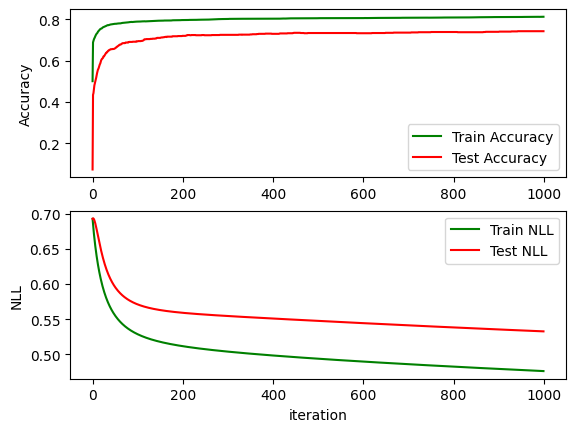

In [1018]:
w, b, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(
    avc_X_train, avc_y_train, avc_X_test, avc_y_test, lr=0.1, alpha=3
)

avc_predictions_manual_logistic = np.array(
    [1 if i >= 0.5 else 0 for i in predict_logistic(avc_X_test, w, b)]
)
plot_evolution(train_acc, test_acc, train_nll, test_nll)

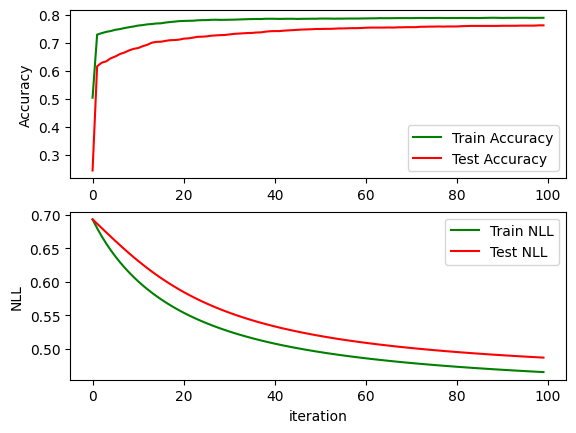

In [1019]:
w, b, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(
    salary_X_train,
    salary_y_train,
    salary_X_test,
    salary_y_test,
    lr=0.1,
    alpha=0.1,
    epochs_no=100,
)

salary_predictions_manual_logistic = np.array(
    [1 if i >= 0.5 else 0 for i in predict_logistic(salary_X_test, w, b)]
)
plot_evolution(train_acc, test_acc, train_nll, test_nll)

##### 3.1.2. Implementare folosind biblioteca scikit-learn

In [1032]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(
    max_iter=1000, C=0.01, penalty="l2", solver="saga", tol=0.0001
)
logisticRegr.fit(avc_X_train, avc_y_train)
avc_predictions_scikit_logistic = logisticRegr.predict(avc_X_test)

In [1021]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(
    max_iter=1000, C=100, penalty="l2", solver="saga", tol=0.1
)
logisticRegr.fit(salary_X_train, salary_y_train)
salary_predictions_scikit_logistic = logisticRegr.predict(salary_X_test)

### 3.2. Multi-Layered Perceptron

##### 3.1.1. Implementare manuala

In [1022]:
class Layer:
    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing


from typing import List


class FeedForwardNetwork:
    def __init__(self, layers: List[Layer], alpha=0.01):
        self.layers = layers
        self.alpha = alpha  # L2 regularization

    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x

    def backward(self, dy: np.ndarray) -> np.ndarray:
        for x, layer in zip(reversed(self._inputs), reversed(self.layers)):
            dy = layer.backward(x, dy)
        return dy

    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(self.alpha, *args, **kwargs)


class Linear(Layer):
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6.0 / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))

        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)

    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self.weight) + self.bias

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        self.dweight = np.dot(x.T, dy)
        self.dbias = np.sum(dy, axis=0)
        return np.dot(dy, self.weight.T)

    def update(self, alpha=0.01, mode="SGD", lr=0.001):
        if mode == "SGD":
            self.weight = self.weight - lr * (self.dweight + alpha * self.weight)
            self.bias = self.bias - lr * self.dbias
        else:
            raise ValueError("mode should be SGD, not " + str(mode))


class ReLU(Layer):
    def __init__(self) -> None:
        pass

    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(0, x)

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        return dy * (x > 0)


class CrossEntropy:
    def __init__(self):
        pass

    def softmax(self, x):
        x = x.astype(float)
        exps = np.exp(x)
        return exps / np.sum(exps, axis=1).reshape(-1, 1)

    def forward(
        self, y: np.ndarray, t: np.ndarray, alpha=0.01, layers: List[Layer] = None
    ) -> float:
        p = self.softmax(y)
        sum_loss = 0
        for i in range(len(t)):
            sum_loss += -np.log(p[i, t[i]])
        loss = sum_loss / len(t)

        if layers:
            penalty = 0
            for layer in layers:
                if isinstance(layer, Linear):
                    penalty += np.sum(layer.weight**2)
            loss += alpha * penalty / 2
        return loss

    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        p = self.softmax(y)
        for i in range(len(t)):
            p[i, t[i]] -= 1
        return p / len(t)


def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    return np.mean(np.argmax(y, axis=1) == t)

In [1023]:
def MLPClassifier_manual(
    dataset_X_train,
    dataset_y_train,
    dataset_X_test,
    dataset_y_test,
    batch_size=128,
    hidden_units=20,
    epochs_no=200,
    alpha=0.01,
):
    attr_no = dataset_X_train.shape[1]
    optimize_args = {"mode": "SGD", "lr": 0.0005}

    net = FeedForwardNetwork(
        [
            Linear(attr_no, hidden_units),  # Input layer
            ReLU(),  # Hidden layer
            Linear(hidden_units, 2),  # Output layer
        ],
        alpha=alpha,
    )

    cost_function = CrossEntropy()

    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for _ in range(epochs_no):
        for _, idx in enumerate(range(0, len(dataset_X_train), batch_size)):
            # Pregatim urmatorul batch
            x = dataset_X_train[idx : idx + batch_size]
            t = dataset_y_train[idx : idx + batch_size].values

            # Calculam gradientul
            y = net.forward(x)
            # loss = cost_function.forward(y, t, alpha, net.layers)
            dy = cost_function.backward(y, t)
            net.backward(dy)

            # Actualizam parametrii retelei
            net.update(**optimize_args)

        y = net.forward(dataset_X_train, train=False)
        train_acc.append(accuracy(y, dataset_y_train))
        train_nll.append(cost_function.forward(y, dataset_y_train))

        y = net.forward(dataset_X_test, train=False)
        test_acc.append(accuracy(y, dataset_y_test))
        test_nll.append(cost_function.forward(y, dataset_y_test))

    return net, train_acc, train_nll, test_acc, test_nll

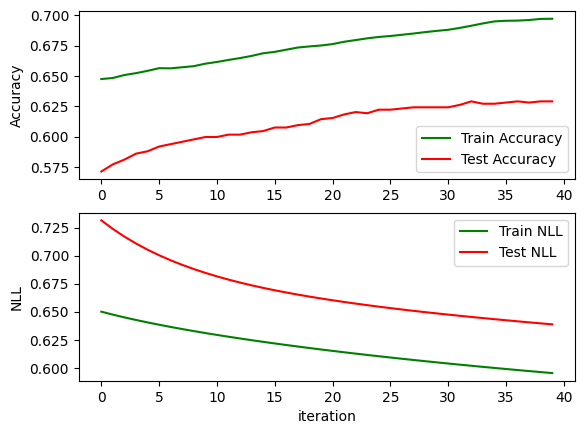

In [1034]:
net, train_acc, train_nll, test_acc, test_nll = MLPClassifier_manual(
    avc_X_train,
    avc_y_train,
    avc_X_test,
    avc_y_test,
    epochs_no=40,
    alpha=0.01,
    batch_size=200,
)
predictions = net.forward(avc_X_test, train=False)
avc_predictions_manual_mlp = np.argmax(predictions, axis=1)
plot_evolution(train_acc, test_acc, train_nll, test_nll)

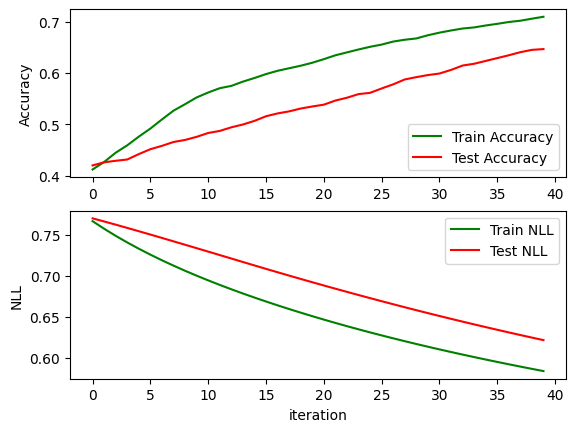

In [1025]:
net, train_acc, train_nll, test_acc, test_nll = MLPClassifier_manual(
    salary_X_train,
    salary_y_train,
    salary_X_test,
    salary_y_test,
    epochs_no=40,
    alpha=0.01,
    batch_size=200,
)
predictions = net.forward(salary_X_test, train=False)
salary_predictions_manual_mlp = np.argmax(predictions, axis=1)
plot_evolution(train_acc, test_acc, train_nll, test_nll)

##### 3.1.2. Implementare folosind biblioteca scikit-learn

In [1026]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    alpha=3,
    early_stopping=True,
    activation="relu",
    solver="sgd"
)
mlp.fit(avc_X_train, avc_y_train)

avc_predictions_scikit_mlp = mlp.predict(avc_X_test)

In [1027]:
mlp = MLPClassifier(alpha=0.1, early_stopping=True, activation="relu", solver="adam")
mlp.fit(salary_X_train, salary_y_train)

salary_predictions_scikit_mlp = mlp.predict(salary_X_test)

## 3.3. Evaluarea algoritmilor

In [1028]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    accuracy_score,
)
import seaborn as sns


def visualize_predicition(predictions, actual, labels):
    cnf = confusion_matrix(actual, predictions)

    sns.heatmap(
        cnf, annot=True, cmap="Blues", fmt="", xticklabels=labels, yticklabels=labels
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Calculate accuracy
    accuracy = accuracy_score(actual, predictions)

    # Calculate precision
    precision = precision_score(actual, predictions)

    # Calculate recall
    recall = recall_score(actual, predictions)

    # Calculate F1-score
    f1 = f1_score(actual, predictions)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    return (accuracy, precision, recall, f1)

In [1029]:
def display_algo_comparison(
    manual_logistic_metrics,
    scikit_logistic_metrics,
    manual_mlp_metrics,
    scikit_mlp_metrics,
):
    metrics_data = {
        "Model": [
            "Manual Logistic Regression",
            "Scikit Logistic Regression",
            "Manual MLP",
            "Scikit MLP",
        ],
        "Accuracy": [
            manual_logistic_metrics[0],
            scikit_logistic_metrics[0],
            manual_mlp_metrics[0],
            scikit_mlp_metrics[0],
        ],
        "Precision": [
            manual_logistic_metrics[1],
            scikit_logistic_metrics[1],
            manual_mlp_metrics[1],
            scikit_mlp_metrics[1],
        ],
        "Recall": [
            manual_logistic_metrics[2],
            scikit_logistic_metrics[2],
            manual_mlp_metrics[2],
            scikit_mlp_metrics[2],
        ],
        "F1-score": [
            manual_logistic_metrics[3],
            scikit_logistic_metrics[3],
            manual_mlp_metrics[3],
            scikit_mlp_metrics[3],
        ],
    }

    df_metrics = pd.DataFrame(metrics_data)

    # Highlighting the highest value in each column
    def highlight_max(data, color="green"):
        attr = "font-weight: bold; background-color: {}".format(color)
        if data.ndim == 1:  # Series from .apply(axis=0 or 1)
            is_max = data == data.max()
            return [attr if v else "" for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(
                np.where(is_max, attr, ""), index=data.index, columns=data.columns
            )

    # Applying the highlight function to the DataFrame
    styled_df = (
        df_metrics.style.apply(
            highlight_max, subset=["Accuracy", "Precision", "Recall", "F1-score"]
        )
        .set_table_styles(
            [
                {"selector": "tr:hover", "props": [("background-color", "#f2f2f2")]},
                {
                    "selector": "th",
                    "props": [("font-size", "110%"), ("text-align", "center")],
                },
                {"selector": "td", "props": [("text-align", "center")]},
            ]
        )
        .hide(axis="index")
        .set_properties(**{"border": "1px solid black", "border-collapse": "collapse"})
    )

    return styled_df

AVC
Manual Logistic Regression


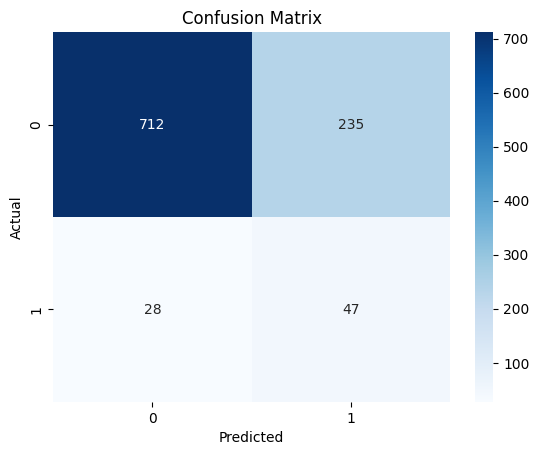

Accuracy: 0.7426614481409002
Precision: 0.16666666666666666
Recall: 0.6266666666666667
F1-score: 0.26330532212885155
Scikit Logistic Regression


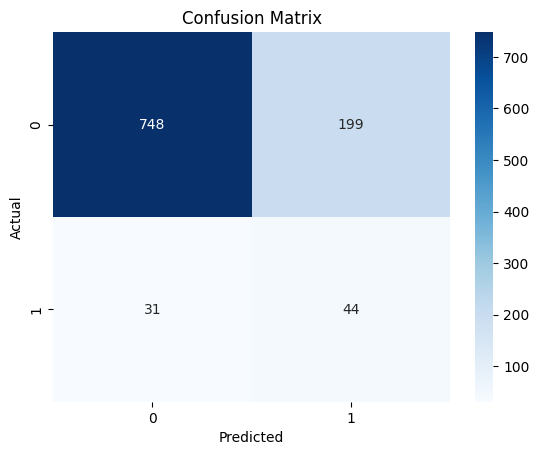

Accuracy: 0.7749510763209393
Precision: 0.18106995884773663
Recall: 0.5866666666666667
F1-score: 0.27672955974842767
Manual MLP


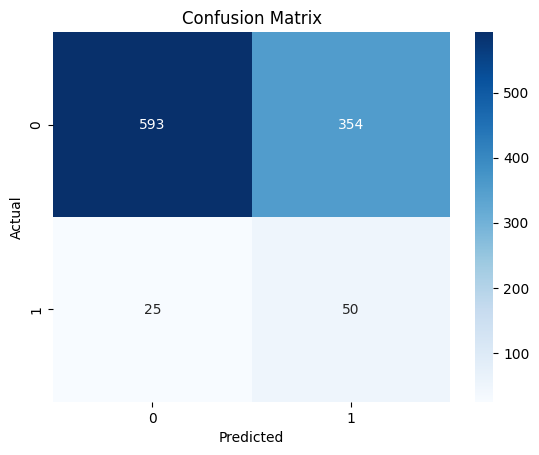

Accuracy: 0.6291585127201565
Precision: 0.12376237623762376
Recall: 0.6666666666666666
F1-score: 0.20876826722338204
Scikit MLP


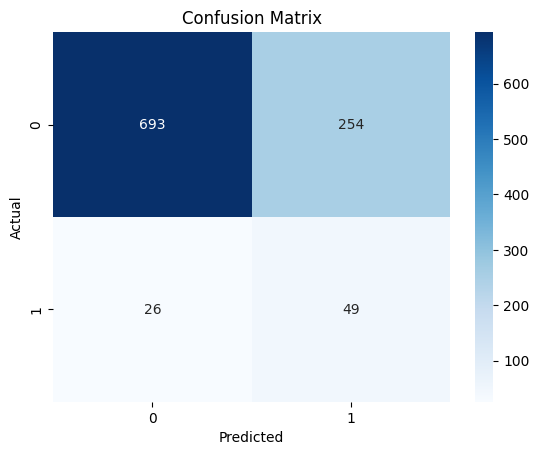

Accuracy: 0.726027397260274
Precision: 0.1617161716171617
Recall: 0.6533333333333333
F1-score: 0.25925925925925924


Model,Accuracy,Precision,Recall,F1-score
Manual Logistic Regression,0.742661,0.166667,0.626667,0.263305
Scikit Logistic Regression,0.774951,0.181070,0.586667,0.276730
Manual MLP,0.629159,0.123762,0.666667,0.208768
Scikit MLP,0.726027,0.161716,0.653333,0.259259


In [1035]:
print("AVC")

print("Manual Logistic Regression")
manual_logistic_metrics = visualize_predicition(
    avc_predictions_manual_logistic, avc_y_test, [0, 1]
)

print("Scikit Logistic Regression")
scikit_logistic_metrics = visualize_predicition(
    avc_predictions_scikit_logistic, avc_y_test, [0, 1]
)

print("Manual MLP")
manual_mlp_metrics = visualize_predicition(
    avc_predictions_manual_mlp, avc_y_test, [0, 1]
)

print("Scikit MLP")
scikit_mlp_metrics = visualize_predicition(
    avc_predictions_scikit_mlp, avc_y_test, [0, 1]
)

table = display_algo_comparison(
    manual_logistic_metrics,
    scikit_logistic_metrics,
    manual_mlp_metrics,
    scikit_mlp_metrics,
)
table

SalaryPrediction
Manual Logistic Regression


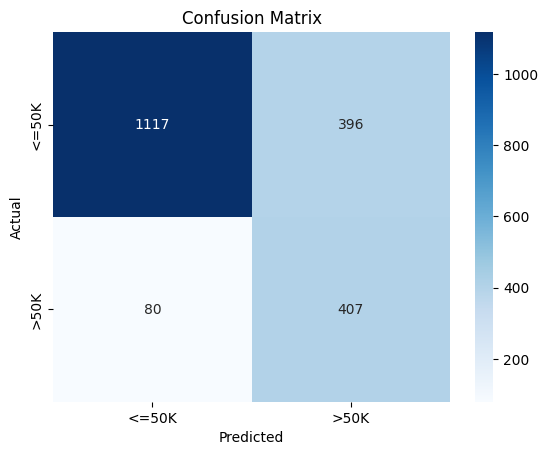

Accuracy: 0.762
Precision: 0.5068493150684932
Recall: 0.8357289527720739
F1-score: 0.6310077519379845
Scikit Logistic Regression


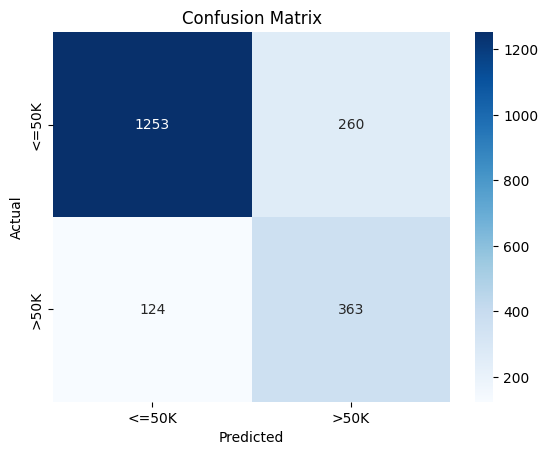

Accuracy: 0.808
Precision: 0.5826645264847512
Recall: 0.7453798767967146
F1-score: 0.654054054054054
Manual MLP


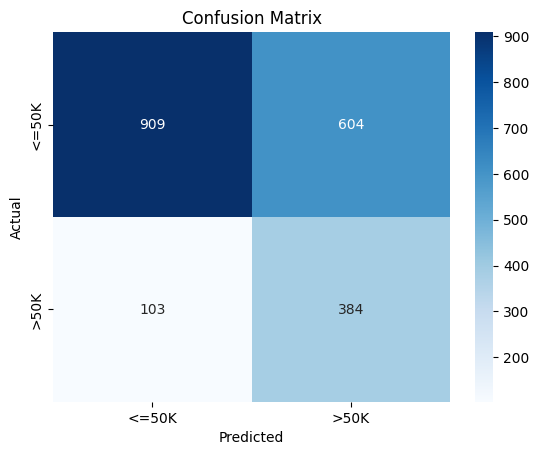

Accuracy: 0.6465
Precision: 0.38866396761133604
Recall: 0.7885010266940452
F1-score: 0.5206779661016949
Scikit MLP


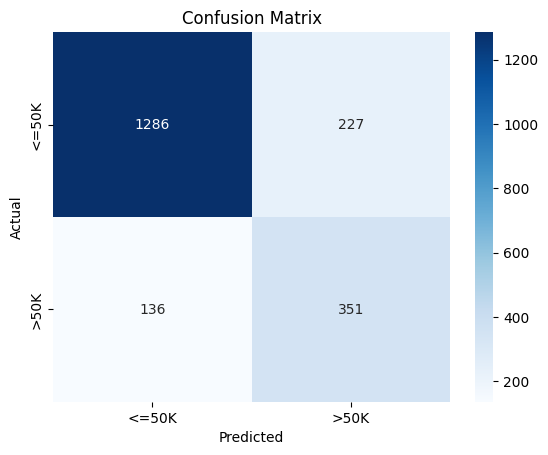

Accuracy: 0.8185
Precision: 0.6072664359861591
Recall: 0.7207392197125256
F1-score: 0.6591549295774648


Model,Accuracy,Precision,Recall,F1-score
Manual Logistic Regression,0.762000,0.506849,0.835729,0.631008
Scikit Logistic Regression,0.808000,0.582665,0.745380,0.654054
Manual MLP,0.646500,0.388664,0.788501,0.520678
Scikit MLP,0.818500,0.607266,0.720739,0.659155


In [1031]:
print("SalaryPrediction")

print("Manual Logistic Regression")
manual_logistic_metrics = visualize_predicition(
    salary_predictions_manual_logistic, salary_y_test, ["<=50K", ">50K"]
)

print("Scikit Logistic Regression")
scikit_logistic_metrics = visualize_predicition(
    salary_predictions_scikit_logistic, salary_y_test, ["<=50K", ">50K"]
)

print("Manual MLP")
manual_mlp_metrics = visualize_predicition(
    salary_predictions_manual_mlp, salary_y_test, ["<=50K", ">50K"]
)

print("Scikit MLP")
scikit_mlp_metrics = visualize_predicition(
    salary_predictions_scikit_mlp, salary_y_test, ["<=50K", ">50K"]
)

table = display_algo_comparison(
    manual_logistic_metrics,
    scikit_logistic_metrics,
    manual_mlp_metrics,
    scikit_mlp_metrics,
)
table